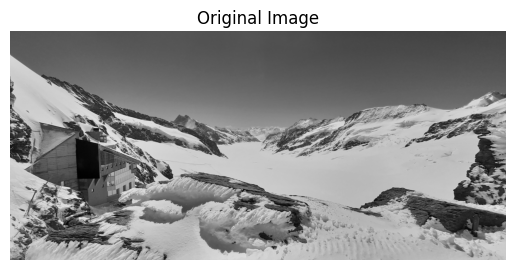

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/Alsetch Glacier.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

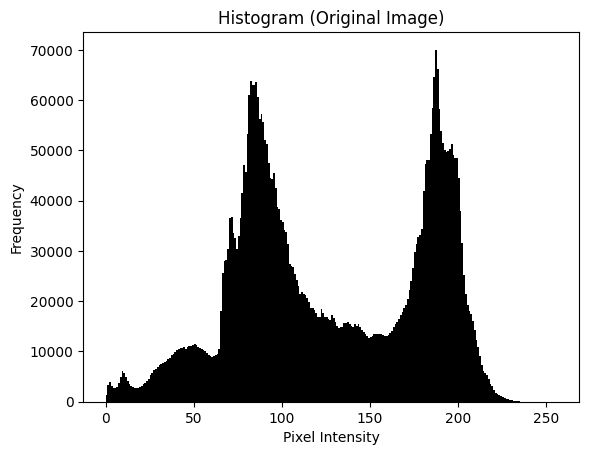

In [10]:
import cv2
import matplotlib.pyplot as plt
# plotting histogram of original image
plt.hist(img.ravel(), bins=256, range=[0,256], color="black")
plt.title("Histogram (Original Image)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


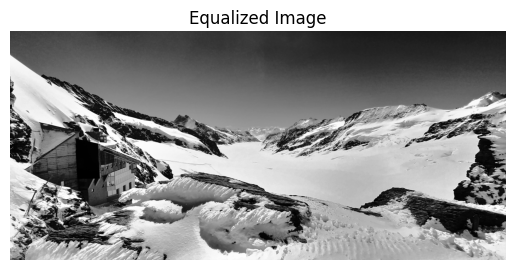

In [11]:
import cv2
import matplotlib.pyplot as plt

# equalization of image
eq_img = cv2.equalizeHist(img)
plt.imshow(eq_img, cmap="gray")
plt.title("Equalized Image")
plt.axis("off")
plt.show()


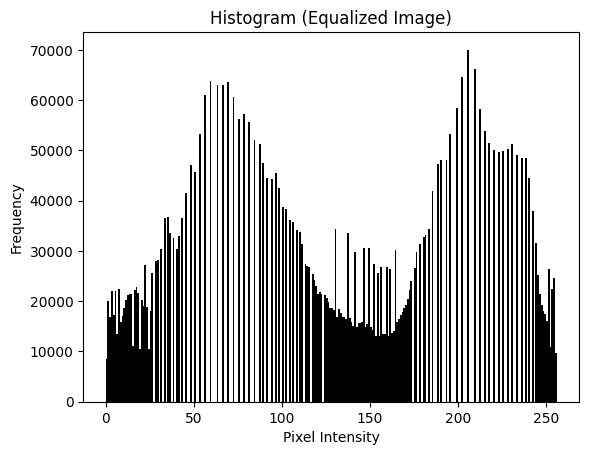

In [12]:
import cv2
import matplotlib.pyplot as plt

eq_img = cv2.equalizeHist(img)

# Plot equalized histogram
plt.hist(eq_img.ravel(), bins=256, range=[0,256], color="black")
plt.title("Histogram (Equalized Image)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

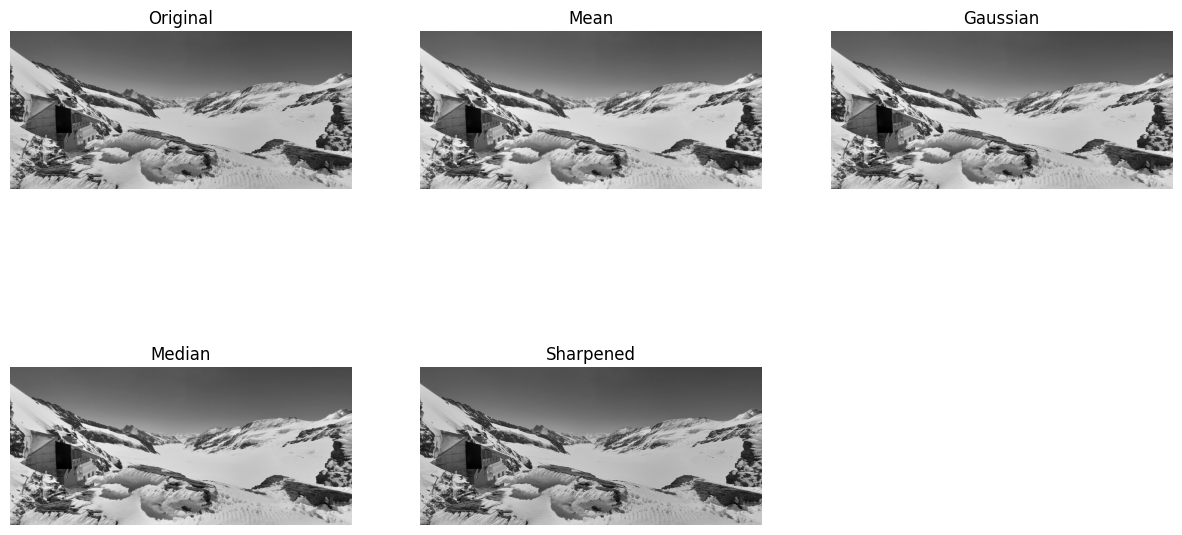

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mean (Average) filter
mean_filter = cv2.blur(img, (5,5))

# Gaussian filter
gaussian_filter = cv2.GaussianBlur(img, (5,5), 1)

# Median filter
median_filter = cv2.medianBlur(img, 5)

# Sharpening filter
kernel_sharpen = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpen_filter = cv2.filter2D(img, -1, kernel_sharpen)

# Display results
titles = ["Original", "Mean", "Gaussian", "Median", "Sharpened"]
images = [img, mean_filter, gaussian_filter, median_filter, sharpen_filter]

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()

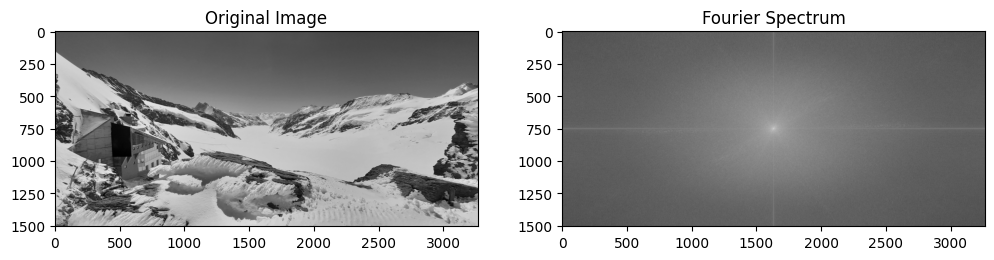

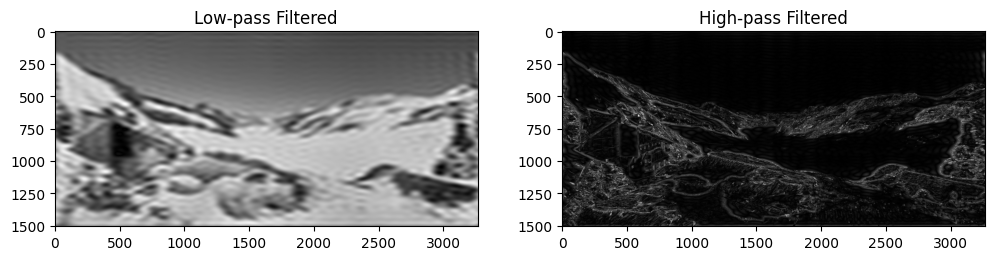

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifft2

# Fourier Transform
f = fft2(img)
fshift = fftshift(f)

# Magnitude Spectrum
magnitude_spectrum = np.log(1 + np.abs(fshift))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title("Fourier Spectrum")
plt.show()

# Low-pass filter
rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask_low = np.zeros((rows, cols), np.uint8)
mask_low[crow-30:crow+30, ccol-30:ccol+30] = 1

low_pass = fshift * mask_low
low_img = np.abs(ifft2(np.fft.ifftshift(low_pass)))

# High-pass filter
mask_high = np.ones((rows, cols), np.uint8)
mask_high[crow-30:crow+30, ccol-30:ccol+30] = 0

high_pass = fshift * mask_high
high_img = np.abs(ifft2(np.fft.ifftshift(high_pass)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1), plt.imshow(low_img, cmap='gray'), plt.title("Low-pass Filtered")
plt.subplot(1,2,2), plt.imshow(high_img, cmap='gray'), plt.title("High-pass Filtered")
plt.show()